In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data=pd.read_csv("Salary.csv")

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


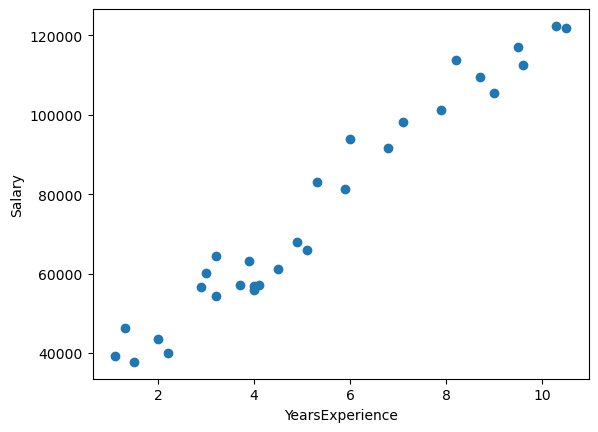

In [6]:
plt.scatter(data["YearsExperience"],data["Salary"])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [7]:
x=data.drop("Salary",axis=1)
y=data["Salary"]
x.shape,y.shape


((30, 1), (30,))

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [9]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
pred=lr.predict(x_test)

In [11]:
pred

array([111739.63917533,  55464.16344282,  37029.09380631, 124353.107874  ,
        63226.29802662,  75839.76672528])

In [12]:
y_test

25    105582.0
7      54445.0
1      46205.0
28    122391.0
12     56957.0
17     83088.0
Name: Salary, dtype: float64

Text(0, 0.5, 'Salary')

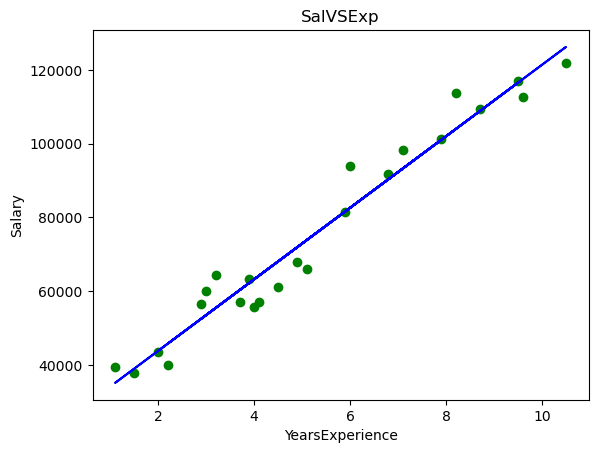

In [13]:
diff=y_test-pred
pd.DataFrame(np.c_[y_test,pred,diff],columns=["Actual","Predicted","Difference"])
plt.scatter(x_train,y_train,color="green")
plt.plot(x_train,lr.predict(x_train),color="blue")
plt.title("SalVSExp")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

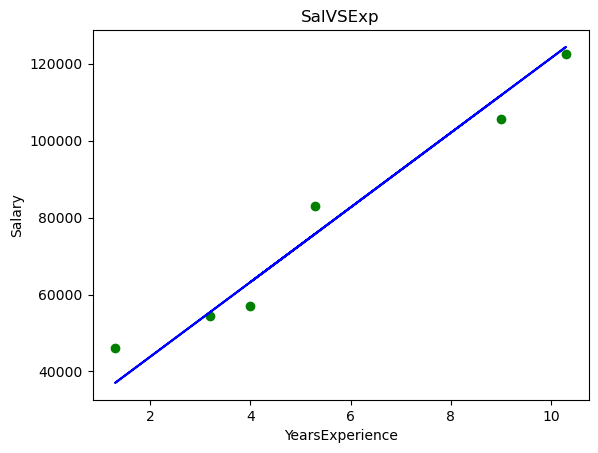

In [14]:
plt.scatter(x_test,y_test,color="green")
plt.plot(x_test,lr.predict(x_test),color="blue")
plt.title("SalVSExp")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [15]:
lr.score(x_test,y_test)


0.9540795870865049

In [16]:
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)
rmse,r2

(6039.361437997895, 0.9540795870865049)

In [19]:
exp=4
lr.predict([[exp]])[0]

E:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


63226.29802661573

In [18]:
diff=y_test-pred
c=pd.DataFrame(np.c_[y_test,pred,diff],columns=["Actual","Predicted","Difference"])
c

,Actual,Predicted,Difference
0,105582.0,111739.639175,-6157.639175
1,54445.0,55464.163443,-1019.163443
2,46205.0,37029.093806,9175.906194
3,122391.0,124353.107874,-1962.107874
4,56957.0,63226.298027,-6269.298027
5,83088.0,75839.766725,7248.233275
